# SKE protokol 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from statistics import mean, variance
import scipy.stats as stat
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)
import reliability as rb
import reliability.Distributions as dist
from reliability.Fitters import Fit_Everything
from reliability.Other_functions import histogram

# Načtení dat

In [34]:
data = pd.read_excel("dataSKE.xlsx")
data.reset_index(inplace = True, drop = True)
print("Data shape:", data.shape)

Data shape: (137, 8)


## Missing values

In [35]:
data.dropna(how = "all",inplace = True)
data.reset_index(inplace = True, drop = True)
print("Data shape:", data.shape)

Data shape: (137, 8)


In [109]:
data.describe()

,treatment,cell_type,survival_time,status,Karnofsky_score,disease_duration_m,age,prior_therapy
count,137,137,137,137,137,137,137,137
mean,1.49635,2.33577,121.628,0.744526,58.5693,8.77372,58.3066,2.91971
std,0.501821,1.06604,157.817,0.437728,20.0396,10.6121,10.5416,4.56337
min,1,1,1,0,10,1,34,0
25%,1,1,25,0,40,3,51,0
50%,1,2,80,1,60,5,62,0
75%,2,3,144,1,75,11,66,10
max,2,4,999,1,99,87,81,10


In [36]:
print("Proměnné", data.columns)

Proměnné Index(['treatment', 'cell_type', 'survival_time', 'status', 'Karnofsky_score', 'disease_duration_m', 'age', 'prior_therapy'], dtype='object')


## Age >60

In [37]:
data_xii = data[data["age"] > 60]


## Druh léčby

In [38]:
data_xii_std = data_xii[data_xii["treatment"] == 1]
data_xii_plac = data_xii[data_xii["treatment"] == 2]

## Cenzorovanost

In [39]:
data_std_cens = data_xii_std[data_xii_std["status"] == 0]
data_std_fail = data_xii_std[data_xii_std["status"] == 1]
data_plac_cens = data_xii_plac[data_xii_plac["status"] == 0]
data_plac_fail = data_xii_plac[data_xii_plac["status"] == 1]

In [40]:
fail_std = np.array(data_std_fail["survival_time"])
cens_std = np.array(data_std_cens["survival_time"])
fail_plac = np.array(data_plac_fail["survival_time"])
cens_plac = np.array(data_plac_cens["survival_time"])

In [41]:
print(fail_std.shape[0])
print(cens_std.shape[0])
print(fail_plac.shape[0])
print(cens_plac.shape[0])
print(cens_plac.shape[0]/data_xii_plac.shape[0])
print(cens_std.shape[0]/data_xii_std.shape[0])

28
10
28
11
0.28205128205128205
0.2631578947368421


# Analýza

## Treatment = 1 (léčba)

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 28/10 (26.31579% right censored) 

  Distribution   Alpha     Beta  Gamma      Mu   Sigma     Lambda  Log-likelihood    AICc     BIC      AD optimizer
      Gamma_3P 287.754 0.543814 6.9999                                   -160.475 327.656 331.863 2.55853       TNC
    Weibull_3P 133.264 0.665956 6.9999                                   -161.892 330.491 334.698 2.52687       TNC
Exponential_2P                  6.9999                 0.00732984        -165.642 335.628  338.56 3.03097       TNC
Exponential_1P                                         0.00685267        -167.527 337.166 338.692 2.49417       TNC
    Weibull_2P 145.993  1.00542                                          -167.527 339.396 342.328 2.50259       TNC
      Gamma_2P 145.082  1.00495                                          -167.527 339.397 342.329 2.49901       TNC
Loglogistic_3P  82.555 0.773146 6.9999                                   -16

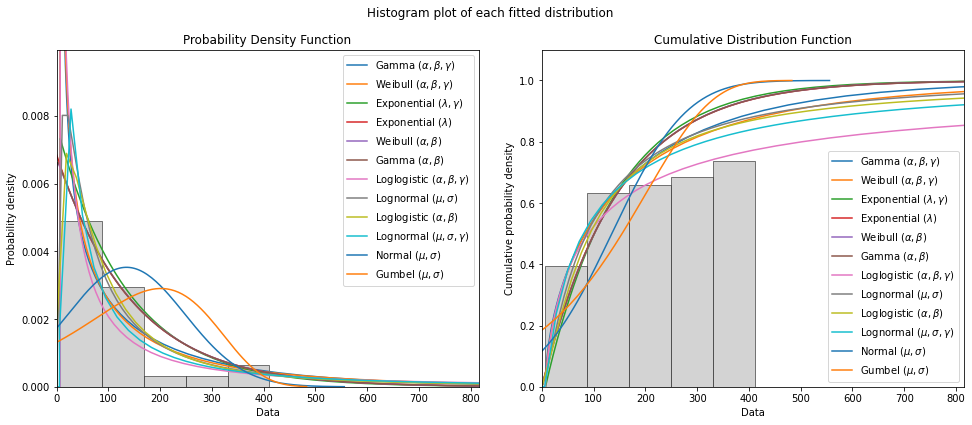

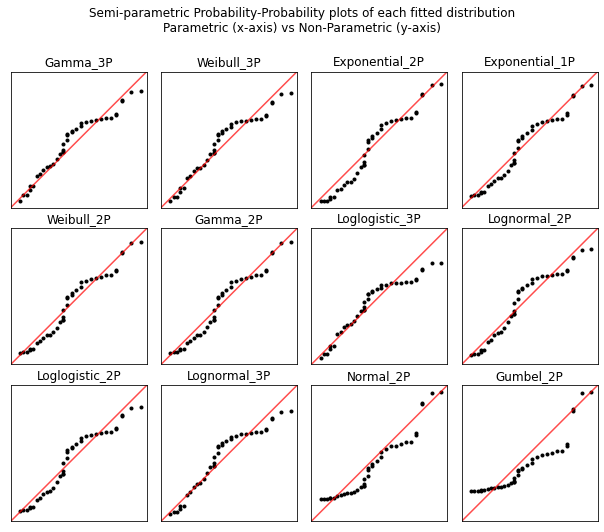

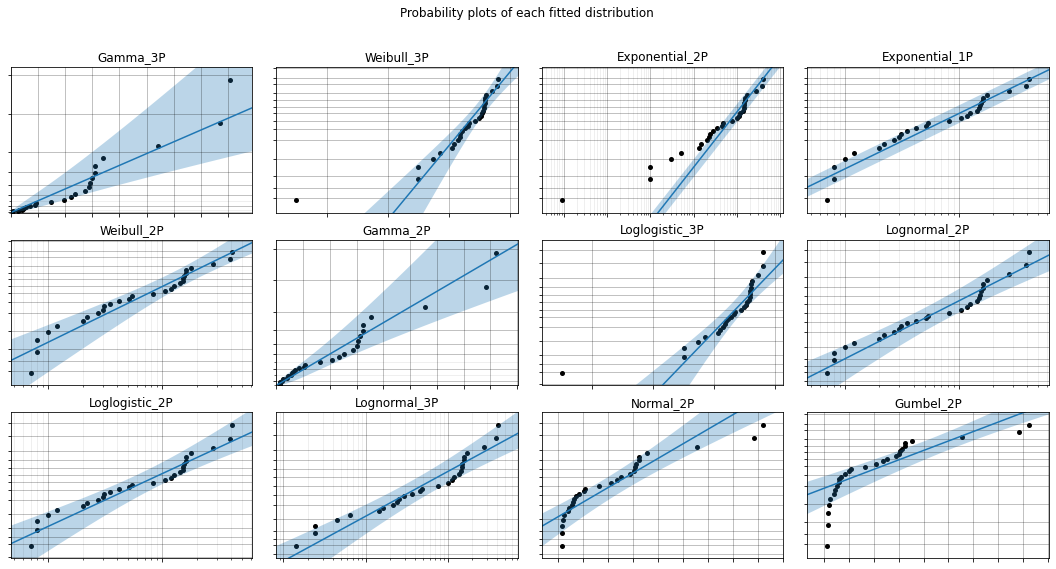

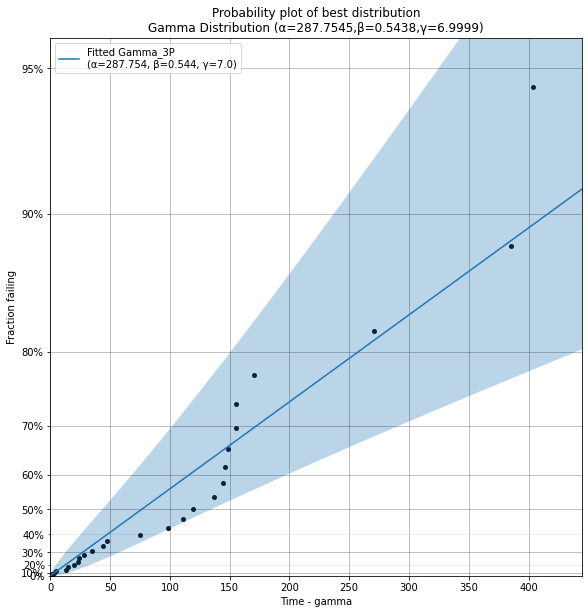

In [42]:
fit_std = Fit_Everything(failures=fail_std, right_censored=cens_std, show_probability_plot=True, print_results=True)

In [43]:
mod_std = fit_std.best_distribution

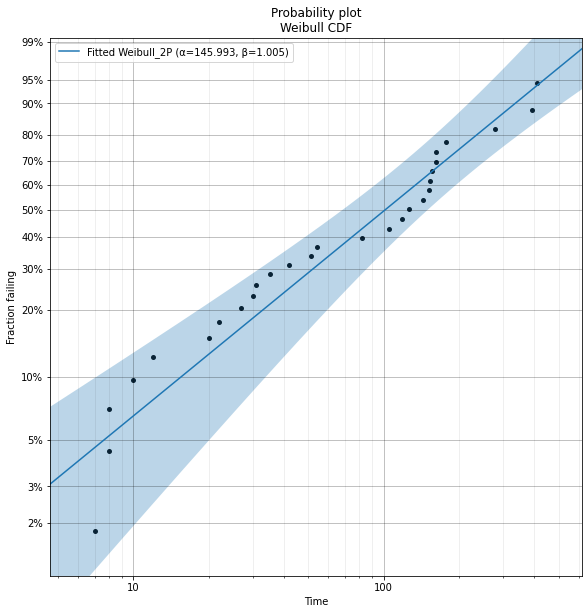

In [44]:
from reliability.Probability_plotting import Weibull_probability_plot
Weibull_probability_plot(failures=fail_std, right_censored=cens_std)
plt.legend()
plt.savefig("std_probplot_gamma.png")
plt.show()

Results from Fit_Weibull_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 28/10 (26.31579% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         133.264         37.8304   76.3976    232.46
     Beta        0.665956        0.108358  0.484113  0.916104
    Gamma          6.9999     0.000170048   6.99957   7.00023 

Goodness of fit    Value
 Log-likelihood -161.892
           AICc  330.491
            BIC  334.698
             AD  2.52687 



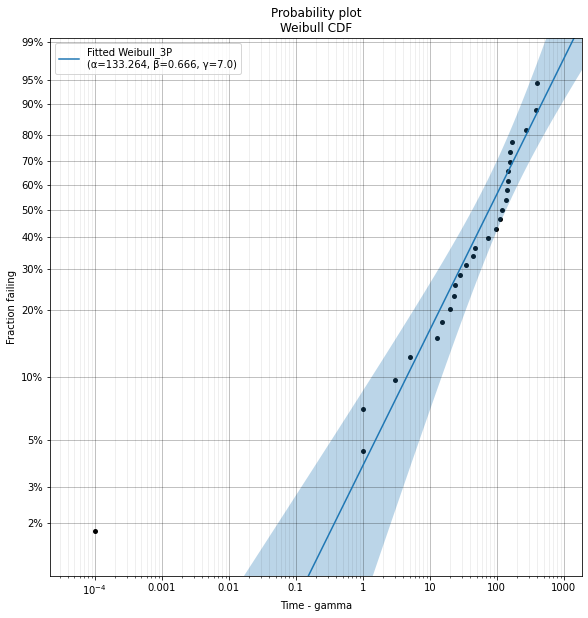

In [45]:
from reliability.Fitters import Fit_Weibull_3P
import matplotlib.pyplot as plt
wb = Fit_Weibull_3P(failures=fail_std, right_censored=cens_std)
plt.show()

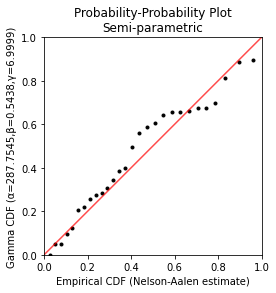

In [46]:
from reliability.Probability_plotting import PP_plot_semiparametric
PP_plot_semiparametric(X_data_failures=fail_std, X_data_right_censored =cens_std, Y_dist=mod_std, method='NA')
plt.savefig("std_ppplot.png")
plt.show()

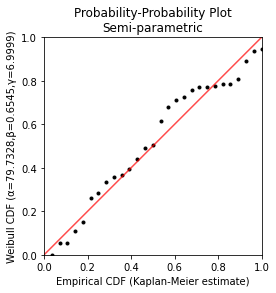

In [47]:
from reliability.Probability_plotting import PP_plot_semiparametric
from reliability.Fitters import Fit_Weibull_3P
from reliability.Distributions import Weibull_Distribution


dist = Fit_Weibull_3P(failures=fail_std,show_probability_plot=False,print_results=False).distribution
PP_plot_semiparametric(X_data_failures=fail_std,Y_dist=dist)
plt.show()

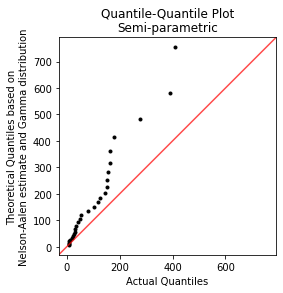

In [48]:
from reliability.Probability_plotting import QQ_plot_semiparametric
QQ_plot_semiparametric(X_data_failures=fail_std, X_data_right_censored =cens_std, Y_dist=mod_std, method='NA', show_diagonal_line=True, show_fitted_lines=False)
plt.savefig("std_qqplot.png")
plt.show()

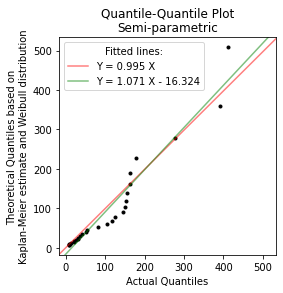

In [49]:
from reliability.Probability_plotting import QQ_plot_semiparametric
from reliability.Fitters import Fit_Weibull_3P
from reliability.Distributions import Weibull_Distribution


dist = Fit_Weibull_3P(failures=fail_std,show_probability_plot=False,print_results=False).distribution
QQ_plot_semiparametric(X_data_failures=fail_std,Y_dist=dist)
plt.show()

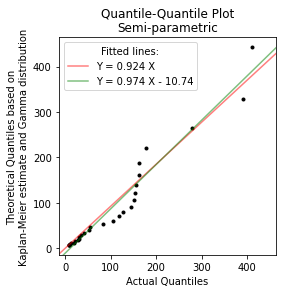

In [50]:
from reliability.Probability_plotting import QQ_plot_semiparametric
from reliability.Fitters import Fit_Gamma_3P
import matplotlib.pyplot as plt

dist = Fit_Gamma_3P(failures=fail_std,show_probability_plot=False,print_results=False).distribution
QQ_plot_semiparametric(X_data_failures=fail_std,Y_dist=dist)
plt.show()

## Treatment = 2 (placebo)

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 28/11 (28.20513% right censored) 

  Distribution   Alpha     Beta     Gamma      Mu   Sigma     Lambda  Log-likelihood    AICc     BIC      AD optimizer
Exponential_1P                                            0.00715746        -166.309 334.726 336.281 2.53104  L-BFGS-B
      Gamma_3P 233.116 0.646832    0.9999                                   -163.522 333.729 338.034 2.50265       TNC
Exponential_2P                     0.9999                 0.00722953        -166.028  336.39 339.384 2.63019       TNC
    Weibull_3P 134.195 0.765783    0.9999                                   -164.232 335.151 339.456 2.42352       TNC
    Weibull_2P  137.84 0.919887                                             -166.132 336.597  339.59 2.38032       TNC
      Gamma_2P 158.476 0.898091                                             -166.179 336.692 339.686 2.41003       TNC
Loglogistic_2P 81.4762  1.26557                        

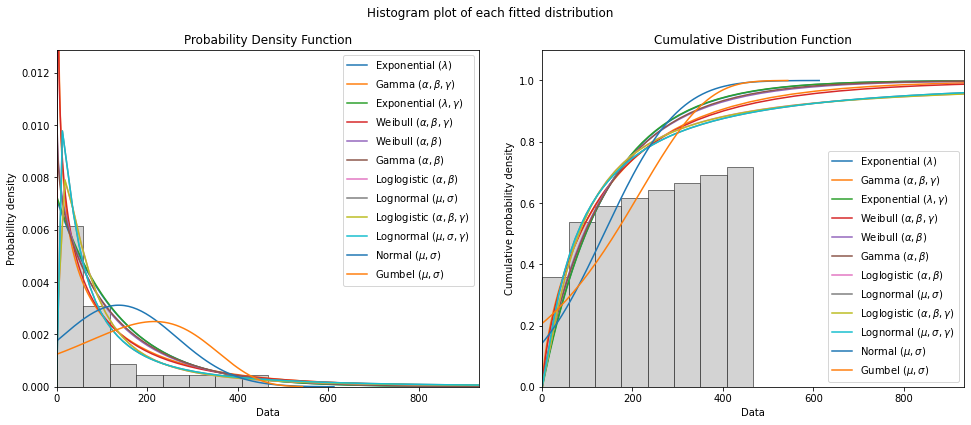

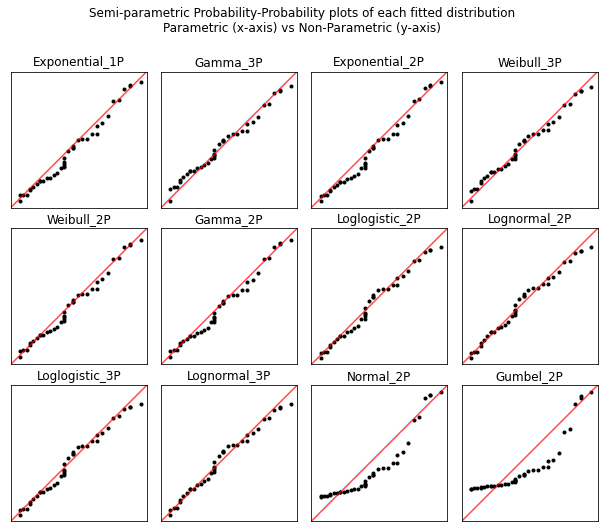

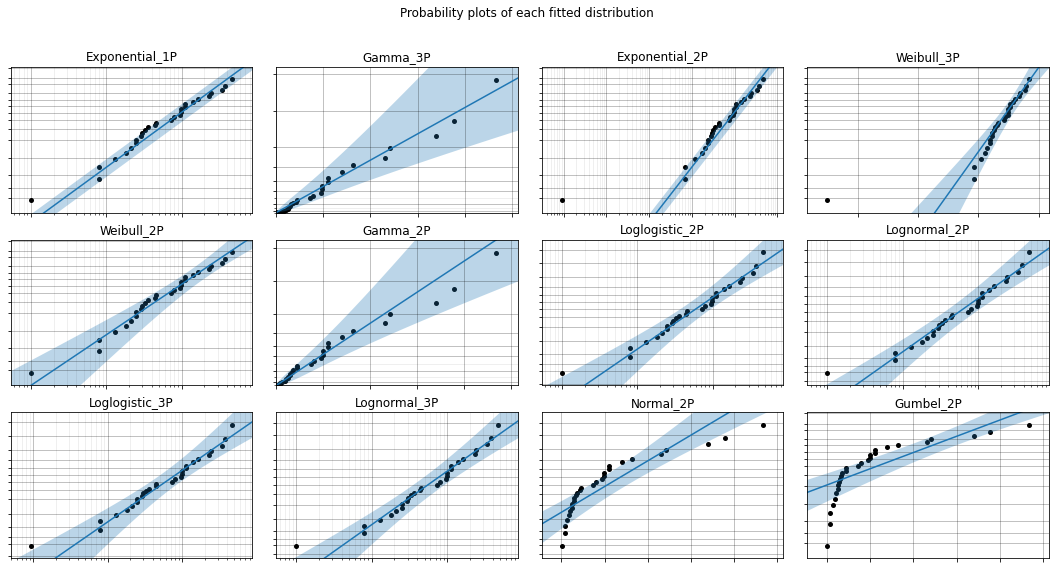

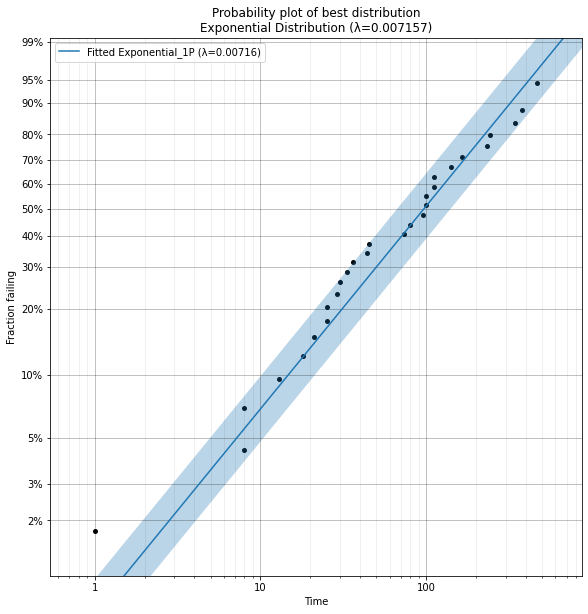

In [51]:
fit_plac = Fit_Everything(failures=fail_plac, right_censored=cens_plac, show_probability_plot=True, print_results=True)

In [52]:
mod_plac = fit_plac.best_distribution

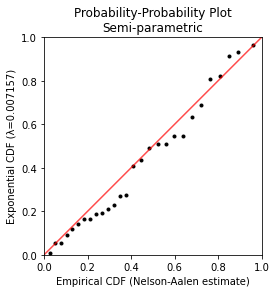

In [53]:
from reliability.Probability_plotting import PP_plot_semiparametric
PP_plot_semiparametric(X_data_failures=fail_plac, X_data_right_censored =cens_plac, Y_dist=mod_plac, method='NA')
plt.show()

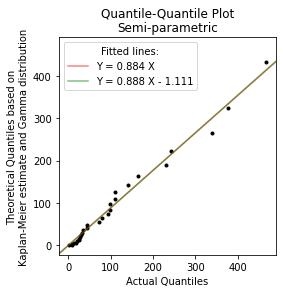

In [54]:
from reliability.Probability_plotting import QQ_plot_semiparametric
from reliability.Fitters import Fit_Exponential_1P
import matplotlib.pyplot as plt

dist = Fit_Gamma_3P(failures=fail_plac,show_probability_plot=False,print_results=False).distribution
QQ_plot_semiparametric(X_data_failures=fail_plac,Y_dist=dist)
plt.show()

## Hazard Plot

In [55]:
from reliability.Nonparametric import KaplanMeier, NelsonAalen, RankAdjustment

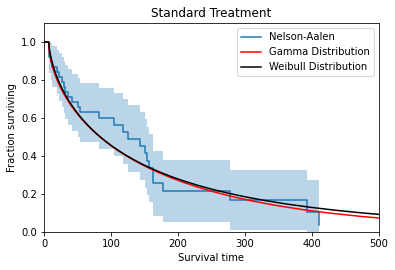

In [56]:
from reliability.Distributions import Weibull_Distribution
dist = Weibull_Distribution(alpha = 133.264, beta = 0.666, gamma = 7.0)

NelsonAalen(failures=fail_std, right_censored=cens_std, print_results=False, show_plot=True, label='Nelson-Aalen')
mod_std.SF(label='Gamma Distribution', color='red')
dist.SF(label='Weibull Distribution', color='black')
plt.xlim((0,500))
plt.title("Standard Treatment")
plt.xlabel("Survival time")
plt.legend()
plt.savefig("std_HP.png")
plt.show()

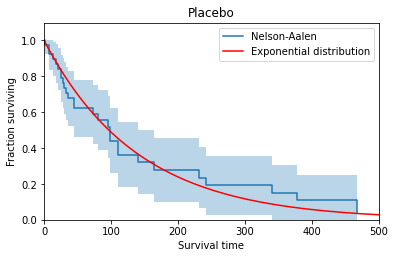

In [57]:
NelsonAalen(failures=fail_plac, right_censored=cens_plac, print_results=False, show_plot=True, label='Nelson-Aalen')
mod_plac.SF(label='Exponential distribution', color='red')
plt.xlim((0,500))
plt.title("Placebo")
plt.xlabel("Survival time")
plt.legend()
plt.savefig("plac_HP.png")
plt.show()

## Časové údaje

In [103]:
print("Placebo - median: ", mod_plac.median)
print("Standard - median: ", mod_std.median)
print("Placebo - střední zbytková doba života: ", mod_plac.mean_residual_life(t = 90))
print("Standard - střední zbytková doba života: ", mod_std.mean_residual_life(t = 90))
print("Placebo - MTTF: ", mean(fail_plac))
print("Standard - MTTF: ", mean(fail_std))

Placebo - median:  96.8425632210206
Standard - median:  83.42191561788684
Placebo - střední zbytková doba života:  139.71428570594236
Standard - střední zbytková doba života:  213.0757359724672
Placebo - MTTF:  105
Standard - MTTF:  106


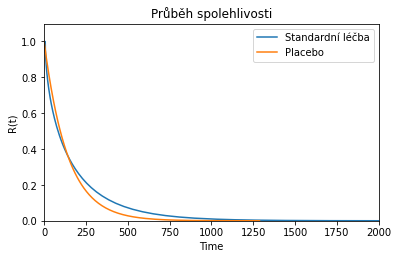

In [96]:
mod_std.SF()
mod_plac.SF()
plt.xlim((0,2000))
plt.title("Průběh spolehlivosti")
plt.legend(["Standardní léčba","Placebo"])
plt.xlabel("Time")
plt.ylabel("R(t)")
plt.savefig("std_SF.png")
plt.show()

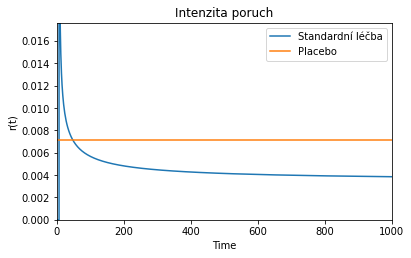

In [98]:
mod_std.HF()
mod_plac.HF()
plt.xlim((0,1000))
plt.title("Intenzita poruch")
plt.legend(["Standardní léčba","Placebo"])
plt.xlabel("Time")
plt.ylabel("r(t)")
plt.savefig("std_HF.png")
plt.show()

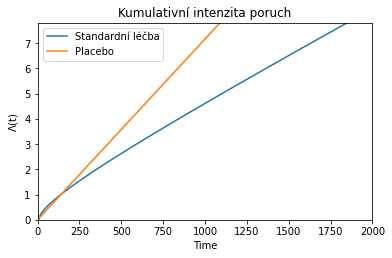

In [102]:
mod_std.CHF()
mod_plac.CHF()
plt.xlim((0,2000))
plt.title("Kumulativní intenzita poruch")
plt.legend(["Standardní léčba","Placebo"])
plt.xlabel("Time")
plt.ylabel("$\Lambda$(t)")
plt.savefig("std_CHF.png")
plt.show()

In [59]:
plac = data_xii_plac["status"]
plac_obs = (~plac.astype(bool)).astype(int)


std = data_xii_std["status"]
std_obs = (~std.astype(bool)).astype(int)

In [60]:
from lifelines import CoxPHFitter

dfA = pd.DataFrame({'E': std_obs, 'T': data_xii_std["survival_time"], 'group': 0})
dfB = pd.DataFrame({'E': plac_obs, 'T': data_xii_plac["survival_time"], 'group': 1})
df = pd.concat([dfA, dfB])

cph = CoxPHFitter().fit(df, 'T', 'E')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 77 total observations, 56 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 77
number of events observed = 21
   partial log-likelihood = -72.14
         time fit was run = 2021-08-28 07:20:19 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
group       0.24       1.27       0.44            -0.62             1.10                 0.54                 3.01

             z    p   -log2(p)
covariate                     
group     0.55 0.58       0.78
---
Concordance = 0.57
Partial AIC = 146.27
log-likelihood ratio test = 0.30 on 1 df
-log2(p) of ll-ratio test = 0.78

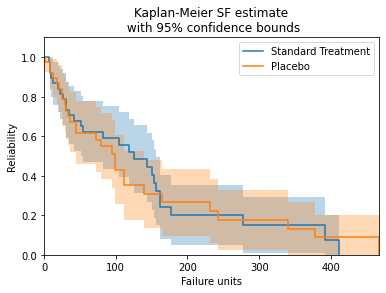

In [88]:
from math import log

km_std = KaplanMeier(failures=fail_std, right_censored=cens_std, print_results=False, show_plot=True, label="Standard Treatment")
km_plac = KaplanMeier(failures=fail_plac, right_censored=cens_plac, print_results=False, show_plot=True, label="Placebo")
plt.legend()
plt.show()


In [89]:
std_time = np.array(km_std.results["Failure times"])
std_sf = np.array(km_std.results["Kaplan-Meier Estimate"])


In [90]:
plac_time = np.array(km_plac.results["Failure times"])
plac_sf = np.array(km_plac.results["Kaplan-Meier Estimate"])


In [91]:
print(std_time)
print(std_sf)
print(plac_time)
print(plac_sf)

[  7   8   8  10  12  12  20  22  27  30  31  35  42  51  54  54  59  72
  82  97 100 105 110 118 126 139 144 151 153 156 162 162 177 182 278 287
 392 411]
[0.97368421 0.94736842 0.92105263 0.89473684 0.89473684 0.8676236
 0.84051037 0.81339713 0.78628389 0.75917065 0.73205742 0.70494418
 0.67783094 0.6507177  0.62360447 0.62360447 0.62360447 0.62360447
 0.59242424 0.59242424 0.59242424 0.55757576 0.55757576 0.52040404
 0.48323232 0.48323232 0.44296296 0.4026936  0.36242424 0.32215488
 0.28188552 0.24161616 0.2013468  0.2013468  0.1510101  0.1510101
 0.07550505 0.        ]
[  1   7   8   8  13  15  18  21  25  25  25  29  30  33  36  44  45  48
  51  53  61  73  80  80  84  95  99  99 111 111 133 140 164 231 242 340
 378 389 467]
[0.97435897 0.97435897 0.94802495 0.92169092 0.8953569  0.8953569
 0.86822487 0.84109284 0.81396081 0.81396081 0.7858932  0.75782559
 0.72975797 0.70169036 0.67362274 0.64555513 0.61748751 0.61748751
 0.61748751 0.61748751 0.61748751 0.58318265 0.54887779 0.54

In [92]:
std_sf[std_sf==0] = 0.0001
plac_sf[plac_sf==0] = 0.0001

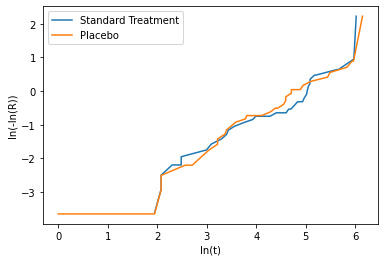

In [93]:
x1 = []
y1 = []
x2 = []
y2 = []

for i in range(0,std_sf.shape[0]):
    x1.append(log(std_time[i]))
    y1.append(log(-log(std_sf[i])))

for i in range(plac_sf.shape[0]):
    x2.append(log(plac_time[i]))
    y2.append(log(-log(plac_sf[i])))

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.legend(["Standard Treatment", "Placebo"])
plt.ylabel("ln(-ln(R))")
plt.xlabel("ln(t)")
plt.savefig("loglof.png")
plt.show()

In [106]:
model_data = data_xii.copy()
data_xii

,treatment,cell_type,survival_time,status,Karnofsky_score,disease_duration_m,age,prior_therapy
0,1,1,72,0,60,7,69,0
1,1,1,411,1,70,5,64,10
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10
6,1,1,82,1,40,10,69,10
7,1,1,110,0,80,29,68,0
9,1,1,100,0,70,6,70,0
10,1,1,42,1,60,4,81,0
11,1,1,8,1,40,58,63,10
12,1,1,144,1,30,4,63,0


In [107]:
model_data["status"] = (~data_xii["status"].astype(bool)).astype(int)
model_data = model_data.rename(columns={'status': 'event'})

In [108]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(model_data, duration_col='survival_time', event_col='event')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 77 total observations, 56 right-censored observations>
             duration col = 'survival_time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 77
number of events observed = 21
   partial log-likelihood = -67.03
         time fit was run = 2021-08-28 09:49:15 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
treatment            0.48       1.61       0.47            -0.44             1.40                 0.65                 4.04
cell_type            0.08       1.08       0.20            -0.32             0.47                 0.73                 1.60
Karnofsky_score     -0.03       0.97       0.01            -0.06            -0.00                 0.94                 1.00
disease_duration_m   0.04       1.04       0.03            -0.02             0.10                 0.98                 1.10
age                 -0.01       0.99       0.07            -0.14             0.12                 0.87                 1.13
prior_therapy       -0.11       0.89       0.07            -0.25             0.02                 0.78                 1.02

                       z    p   -log2(p)
covariate                               
treatment           1.03 0.31       1.71
cell_type           0.38 0.70       0.50
Karnofsky_score    -2.33 0.02       5.66
disease_duration_m  1.34 0.18       2.48
age                -0.15 0.88       0.18
prior_therapy      -1.61 0.11       3.22
---
Concordance = 0.70
Partial AIC = 146.05
log-likelihood ratio test = 10.52 on 6 df
-log2(p) of ll-ratio test = 3.26

In [110]:
a=1 + 5/8 - 1/3 - 25/21 + 10/13 - 5/31
a

0.7091309228406004